<a href="https://colab.research.google.com/github/jadesola123/Medical-Cost-Analysis/blob/main/Medical_Cost_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
#importing python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
#import model libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#import model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR


#import accuracy
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder

In [8]:
url="https://raw.githubusercontent.com/jadesola123/Medical-Cost-Analysis/main/insurance.csv"
cost=pd.read_csv(url)

In [9]:
cost.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [20]:
print(" The shape is " , cost.shape)
print("description is\n", cost.describe())

 The shape is  (1338, 7)
description is
                age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


In [33]:
cost.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [89]:
#searching for missing values
cost.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [90]:
cost['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [91]:
cost['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [92]:
cost['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [93]:
cost.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

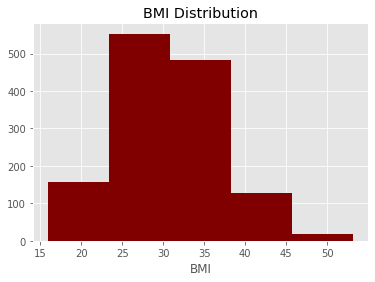

In [94]:
#the distribution of Bmi (Body Mass Index)
plt.style.use('ggplot')
plt.hist(cost['bmi'], bins = 5, color ='maroon')
plt.xlabel("BMI")
plt.title('BMI Distribution')
plt.show()

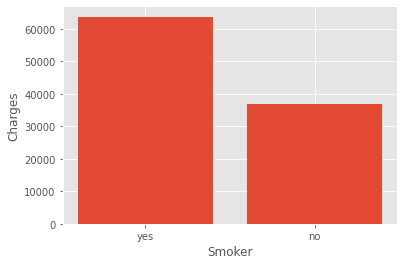

In [95]:
 #the relationship between “smoker” and “charges”
plt.bar(cost['smoker'],cost['charges'])
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.grid(True)
plt.show()

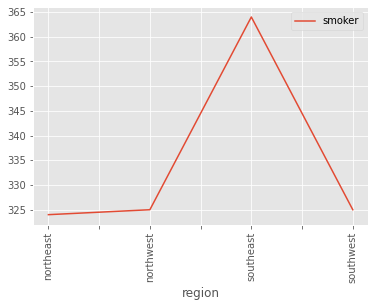

In [99]:
# the relationship between “smoker” and “region”.

children= cost.groupby('region').agg({'smoker':"count"})
## plotting the results
children.plot( legend=True)
plt.xticks(rotation=90)
plt.show()


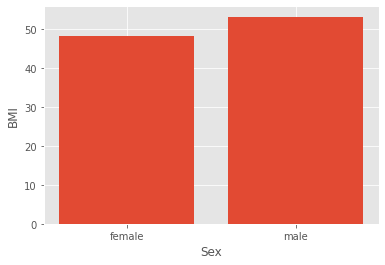

In [40]:
#  the relationship between “bmi” and “sex”.
plt.bar(cost['sex'],cost['bmi'])
plt.xlabel('Sex')
plt.ylabel('BMI')
plt.grid(True)
plt.show()

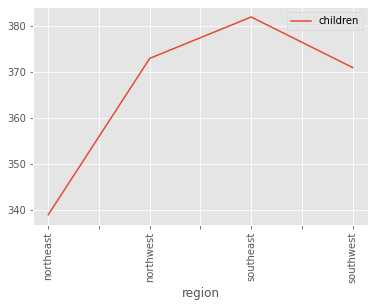

In [43]:
# the "region" with the most "children".
children= cost.groupby('region').agg({'children':sum})
## plotting the results
children.plot( legend=True)
plt.xticks(rotation=90)
plt.show()


SouthEast has the most children

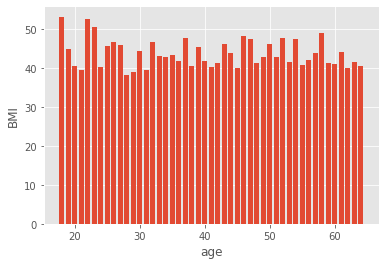

In [48]:
 #the relationship between “age” and “bmi”.
plt.bar(cost['age'],cost['bmi'])
plt.xlabel('age')
plt.ylabel('BMI')
plt.grid(True)
plt.show()

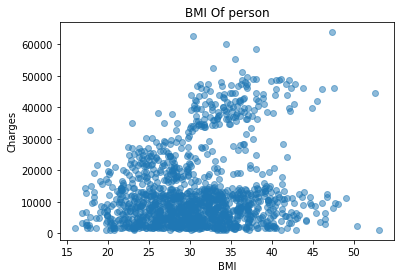

In [26]:
# the relationship between “bmi” and “charges”.
plt.scatter(x=cost['bmi'], y=cost['charges'], alpha=0.5)

plt.title('BMI Of person')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

 Data Preprocessing


In [51]:
# drop dependent feature.

y=cost['charges']

x=cost.drop('charges', axis=1)

In [53]:
x.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region'], dtype='object')

In [52]:
x_ = pd.get_dummies(x, drop_first=True, columns = ['sex','smoker','region'])
x_.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0


In [54]:
X_train, X_test, y_train, y_test = train_test_split(x_, y, test_size = 0.2, random_state = 42)

In [55]:
#feature scaling

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [64]:
def accuracy(yt,yp):
    return round(metrics.r2_score(yt, yp)*100 , 2)

accuracyofModel={}

Model Selection

In [65]:
# Random Forest

regressor = RandomForestRegressor(n_estimators = 100, random_state = 42)
regressor.fit(X_train, y_train)

y_pred = (regressor.predict(X_test))

accuracyofModel['Random Forest']=accuracy(y_test, y_pred)

In [67]:
# Decision Tree

regressor = DecisionTreeRegressor(random_state = 42)
regressor.fit(X_train, y_train)

y_pred = (regressor.predict(X_test))

accuracyofModel['Decision Tree']=accuracy(y_test, y_pred)

In [80]:
# Linear Regression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = (regressor.predict(X_test))

accuracyofModel['MultipleRegression Module']=accuracy(y_test, y_pred)
y_pred

array([ 8969.55027444,  7068.74744287, 36858.41091155,  9454.67850053,
       26973.17345656, 10864.11316424,   170.28084136, 16903.45028662,
        1092.43093614, 11218.34318352, 28101.68455267,  9377.73460205,
        5263.0595179 , 38416.04221107, 40255.82339284, 37098.25353123,
       15240.39392306, 35912.88264434,  9112.52398703, 31461.92108909,
        3847.68845883, 10130.12001517,  2370.54189389,  7140.21550828,
       11301.76782638, 12961.65366224, 14509.47251876,  6159.8976107 ,
        9963.85857263,  2177.85718217,  9115.93673493, 13073.68932159,
        4561.82376202,  3408.20756033,  4459.81359745, 13032.06505076,
        1979.99357292,  8813.28303302, 33271.29124448, 32585.51583927,
        3908.76090964,  4326.10774721, 14142.81326533, 11423.45494846,
        8774.13955311, 12097.28051001,  5281.57353499,  3150.5596042 ,
       35494.46461214,  9150.1124786 , 15836.84575621,  2343.57470069,
       12364.78414194,  1482.29488266, 13389.06105161, 12573.57395972,
      

In [77]:
accuracyofModel

{'Random Forest': 86.56,
 'Decision Tree': 73.72,
 'MultipleRegression Module': 78.36,
 'LinearRegression Module': 78.36}

In [86]:
comparism=pd.DataFrame({"Test value":y_test,"Predicted Value":y_pred})
comparism

,Test value,Predicted Value
764,9095.06825,8969.550274
887,5272.17580,7068.747443
890,29330.98315,36858.410912
1293,9301.89355,9454.678501
259,33750.29180,26973.173457
...,...,...
109,47055.53210,39061.500932
575,12222.89830,11761.499198
535,6067.12675,7687.563632
543,63770.42801,40920.291512


Model Evaluation

In [87]:
r2score=r2_score(comparism["Test value"],comparism["Predicted Value"])
r2score

0.7835929767120723